In [1]:
import pandas as pd
import numpy as np
import tensorflow.keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [4]:
import requests
from google.colab import files
data_to_load = files.upload()

df= pd.read_csv('Resume_dataSet.csv')

Saving Resume_dataSet.csv to Resume_dataSet (3).csv


In [23]:
df = pd.read_csv("Resume_dataSet.csv", encoding='cp1252')
df

,Degree,Experience,Technology,Organization,Eligible,Not Eligible
0,Bachelor of Computer Science in Artificial Int...,5,"Python,R,Deep Learning,Machine Learning","Microsoft,Google",1,0
1,Bachelor of Computer Science in Artificial Int...,1,"Python,R,Deep Learning,Machine Learning","Microsoft,Google",1,0
2,Bachelor of Computer Science in Data Science a...,1,"Python,R,Data Analysis,Probability Theory","Google,IBM",1,0
3,Bachelor of Computer Science in Data Science a...,1,"Python,R,Data Analysis,Probability Theory","Google,IBM",1,0
4,Bachelor of Computer Science in Data Science a...,1,"Python,R,Data Analysis,Probability Theory","Google,IBM",1,0
...,...,...,...,...,...,...
593,Master's in Statistics,3,"SAS, SAS Viya",SAS Institute,1,0
594,Master's in Statistics,3,"SAS, SQL",Google Inc.,1,0
595,Master's in Statistics,3,"SAS, SAS Viya",Oracle Corporation,1,0
596,PhD in Robotics,6,"C++,ROS,Gazebo,Computer Vision","Stanford University,Bosch",1,0


In [7]:
print(df.shape)

df.head()

(598, 6)


,Degree,Experience,Technology,Organization,Eligible,Not Eligible
0,Bachelor of Computer Science in Artificial Int...,5,"Python,R,Deep Learning,Machine Learning","Microsoft,Google",1,0
1,Bachelor of Computer Science in Artificial Int...,1,"Python,R,Deep Learning,Machine Learning","Microsoft,Google",1,0
2,Bachelor of Computer Science in Data Science a...,1,"Python,R,Data Analysis,Probability Theory","Google,IBM",1,0
3,Bachelor of Computer Science in Data Science a...,1,"Python,R,Data Analysis,Probability Theory","Google,IBM",1,0
4,Bachelor of Computer Science in Data Science a...,1,"Python,R,Data Analysis,Probability Theory","Google,IBM",1,0


In [9]:
# Try accessing a row within the valid index range.
# valid indices are from 0 to 597.
df.iloc[100]

Degree          Bachelor of Science in Computer Science and Ma...
Experience                                                      0
Technology                                           C, C++, Java
Organization                          InnoTech Solutions (Europe)
Eligible                                                        0
Not Eligible                                                    1
Name: 100, dtype: object

In [12]:
print(df.info())  # summary of data types and counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Degree        598 non-null    object
 1   Experience    598 non-null    int64 
 2   Technology    598 non-null    object
 3   Organization  598 non-null    object
 4   Eligible      598 non-null    int64 
 5   Not Eligible  598 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 28.2+ KB
None


In [13]:
print(df.describe())  # summary statistics for numerical columns

       Experience    Eligible  Not Eligible
count  598.000000  598.000000    598.000000
mean     2.249164    0.740803      0.259197
std      1.935248    0.438561      0.438561
min      0.000000    0.000000      0.000000
25%      0.000000    0.000000      0.000000
50%      2.000000    1.000000      0.000000
75%      3.000000    1.000000      1.000000
max      7.000000    1.000000      1.000000


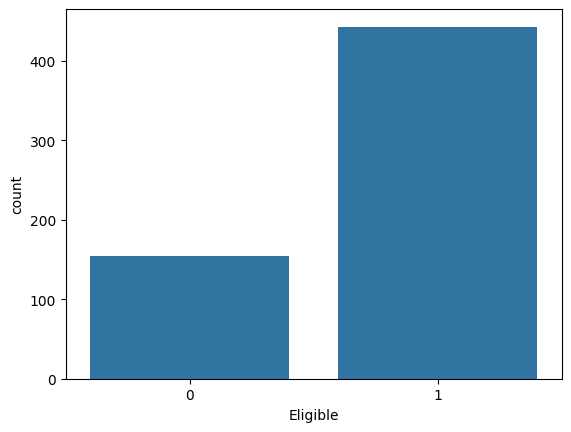

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Eligible', data=df)  # visualize eligible vs. not eligible
plt.show()



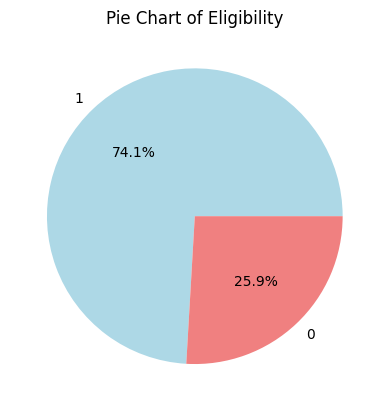

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
# Pie chart
df['Eligible'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Pie Chart of Eligibility')
plt.ylabel('')  # Hide the 'None' label
plt.show()


# **TEXT PREPROCESSING (TECHNOLOGY COLUMN)**

In [21]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t not in stop_words]
    return ' '.join(tokens)

df['Technology'] = df['Technology'].apply(preprocess_text)

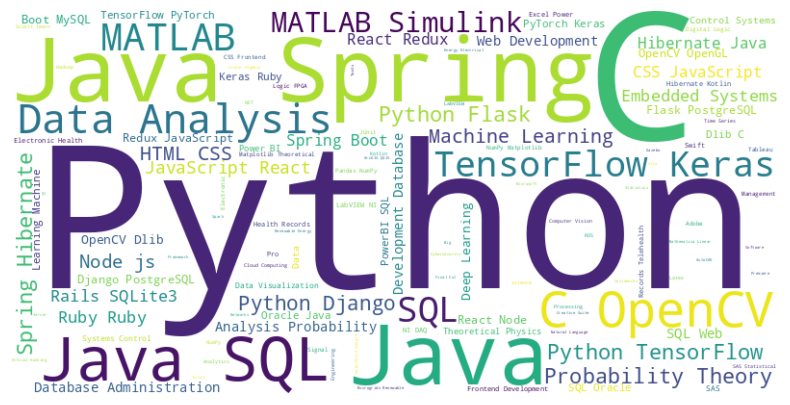

In [33]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all preprocessed text into a single string
text = ' '.join(df['Technology'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=STOPWORDS).generate(text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **TOXENIZATION**

In [22]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['Technology'])

sequences = tokenizer.texts_to_sequences(df['Technology'])
padded_sequences = pad_sequences(sequences, maxlen=50)

print(padded_sequences.shape)

(598, 50)


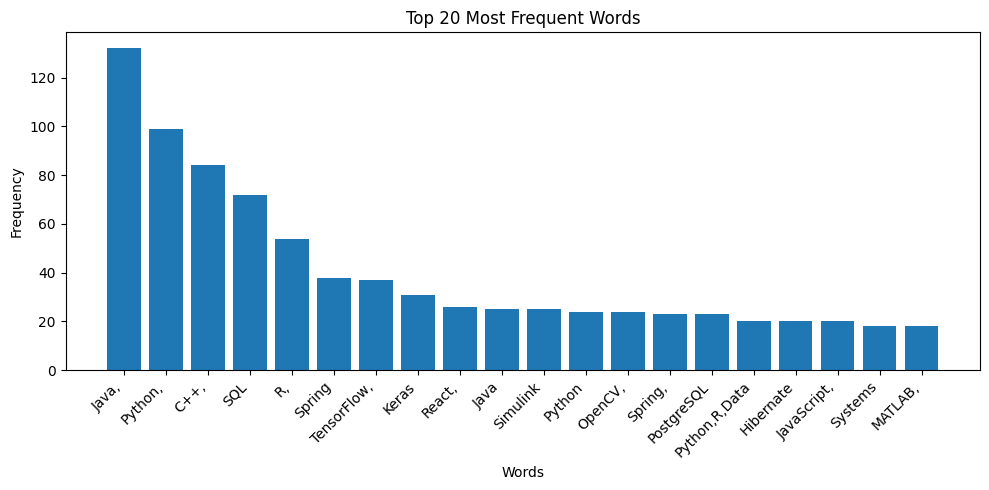

In [34]:
# @title WORD FREQUENCY
from collections import Counter
import matplotlib.pyplot as plt

# Combine all preprocessed text into a single string
text = ' '.join(df['Technology'])

# Count word frequencies
word_counts = Counter(text.split())

# Get the 20 most common words and their counts
top_words = word_counts.most_common(20)

# Extract words and counts for plotting
words, counts = zip(*top_words)

# Create a bar chart
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

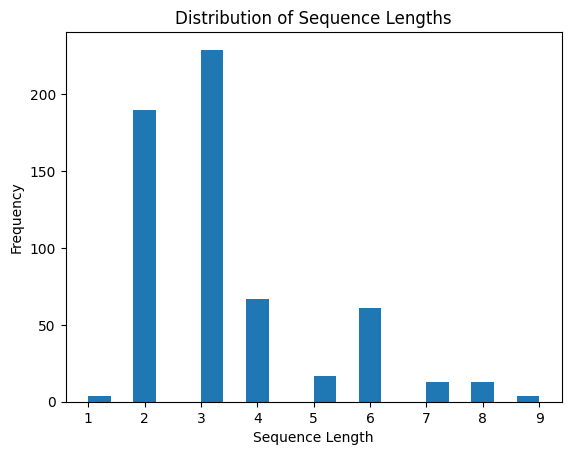

In [35]:
# @title Sequence Length Distribution
import matplotlib.pyplot as plt

# Calculate sequence lengths
sequence_lengths = [len(seq) for seq in sequences]

# Create a histogram
plt.hist(sequence_lengths, bins=20)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths')
plt.show()

In [36]:
# @title Toxenized Sequence (Text converted into numerical)
# Print the first 5 tokenized sequences
for i in range(5):
    print(f"Sequence {i+1}: {sequences[i]}")

Sequence 1: [2, 5, 39, 14, 27, 14]
Sequence 2: [2, 5, 39, 14, 27, 14]
Sequence 3: [2, 5, 8, 10, 21, 19]
Sequence 4: [2, 5, 8, 10, 21, 19]
Sequence 5: [2, 5, 8, 10, 21, 19]
